<a href="https://colab.research.google.com/github/kiranbeethoju/DataSets/blob/master/Trivago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,8
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#Note Note Note Note Note Note Note Note Note Note
# Here final working data is defined as "df" in bottom which was filtered with 4 columns

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/kiranbeethoju/DataSets/master/hotels.csv", usecols = [0,1,2,3,4,5,6,7,8,9])
pos = pd.read_csv("https://raw.githubusercontent.com/kiranbeethoju/DataSets/master/pois.csv")


In [8]:
data['overall_rating'].fillna(data['overall_rating'].median(),inplace = True)
data.isnull().sum()
data['hospitality'] = data['impression_level']+data['interaction_level']/2
data.drop(['impression_level','interaction_level','longitude','latitude'], axis=1, inplace =True)
data.head(4)


,hotel_id,city_id,hotel_type,basename,distance_to_center,overall_rating,hospitality
0,11511119,31497,Hotel,Xi Hu,2799,3.0,1.5
1,11577919,14121,Hotel,Colors Urban Thessaloniki,586,5.0,1.5
2,11530983,27561,Hotel,Van der Valk Hotel Oostzaan - Amsterdam,6485,5.0,2.0
3,11814291,14121,Hotel,Elia City,611,3.0,1.5


In [0]:
data['score'] = data['overall_rating']+data['hospitality']

In [10]:
data.replace({'city_id':{14121 : "city1"}}, inplace=True)
data.replace({'city_id':{14257:"city2"}},inplace=True)
data.replace({'city_id':{27561:"city3"}},inplace=True)
data.replace({'city_id':{31497:"city4"}},inplace=True)
data.head(6)

,hotel_id,city_id,hotel_type,basename,distance_to_center,overall_rating,hospitality,score
0,11511119,city4,Hotel,Xi Hu,2799,3.0,1.5,4.5
1,11577919,city1,Hotel,Colors Urban Thessaloniki,586,5.0,1.5,6.5
2,11530983,city3,Hotel,Van der Valk Hotel Oostzaan - Amsterdam,6485,5.0,2.0,7.0
3,11814291,city1,Hotel,Elia City,611,3.0,1.5,4.5
4,11938295,city4,Home / Apartment,Le Petit Rosedale Hong Kong,2870,3.0,1.5,4.5
5,214201,city1,Hotel,Pella,626,2.0,1.5,3.5


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


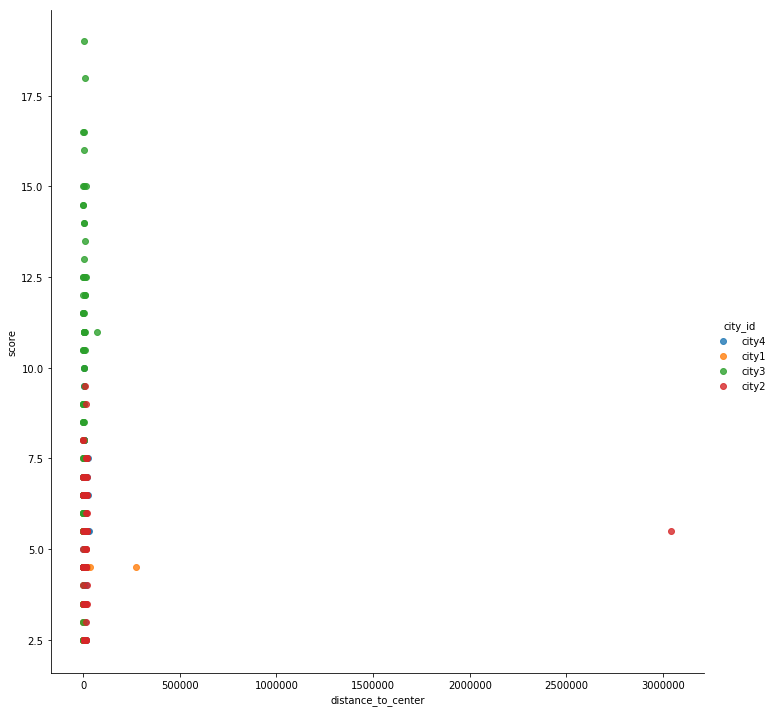

In [11]:
vis2 = sns.lmplot(data=data, x= 'distance_to_center', y ='score', fit_reg= False, hue = 'city_id', size=10, aspect=1) 

In [0]:


new_columns = ['hotel_id','city_id','distance_to_center', 'score'] 
# previously ncsv[new_columns].to_csv('new.csv', index=False)
# ncsv[new_columns].to_csv('new.csv', index=False)

data[new_columns].to_csv('new.csv', index=False)



In [0]:
 
ncsv = pd.read_csv('new.csv')
mv = max(ncsv['score'])
for i in ncsv['score']:
  ncsv['per'] = ncsv['score']/.19
  i +=1

In [14]:

ncsv.rename(columns={'per':'score'}, inplace=True)

ncsv.head(5)


,hotel_id,city_id,distance_to_center,score,score
0,11511119,city4,2799,4.5,23.684211
1,11577919,city1,586,6.5,34.210526
2,11530983,city3,6485,7.0,36.842105
3,11814291,city1,611,4.5,23.684211
4,11938295,city4,2870,4.5,23.684211


In [15]:
ncsv.dtypes

hotel_id                int64
city_id                object
distance_to_center      int64
score                 float64
score                 float64
dtype: object

In [16]:
final = pd.read_csv('https://raw.githubusercontent.com/kiranbeethoju/DataSets/master/filtered.csv')
df = pd.DataFrame(final)
df.describe()

,hotel_id,city_id,distance_to_center,score
count,4.000000e+02,400.000000,4.000000e+02,400.000000
mean,4.244724e+06,21859.000000,1.321433e+04,31.375000
std,5.293982e+06,7805.128062,1.526345e+05,14.824886
min,1.585300e+04,14121.000000,0.000000e+00,13.157895
25%,1.083580e+05,14223.000000,9.305000e+02,23.684211
50%,1.934913e+06,20909.000000,2.337000e+03,28.947368
75%,7.009567e+06,28545.000000,6.200750e+03,36.842105
max,1.963608e+07,31497.000000,3.043545e+06,100.000000


In [0]:
array = df.values
X = array[:,0:3]
Y = array[:,3]
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [18]:
type(y_train)

numpy.ndarray

In [19]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))


df


,hotel_id,city_id,distance_to_center,score
0,11511119,31497,2799,23.684211
1,11577919,14121,586,34.210526
2,11530983,27561,6485,36.842105
3,11814291,14121,611,23.684211
4,11938295,31497,2870,23.684211
5,214201,14121,626,18.421053
6,15891,14257,15730,23.684211
7,28219,27561,2597,55.263158
8,33175,31497,1759,39.473684
9,65997,14121,1483,18.421053


(400, 4)


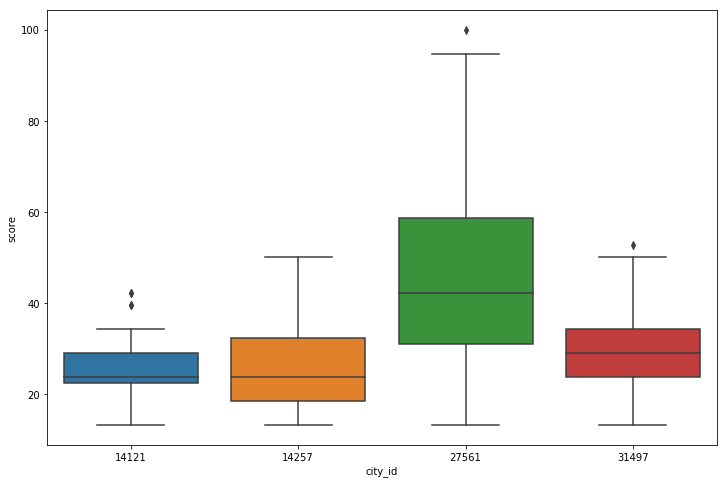

In [20]:
print (df.shape)
vis3 = sns.boxplot(data=df, x='city_id', y ='score')

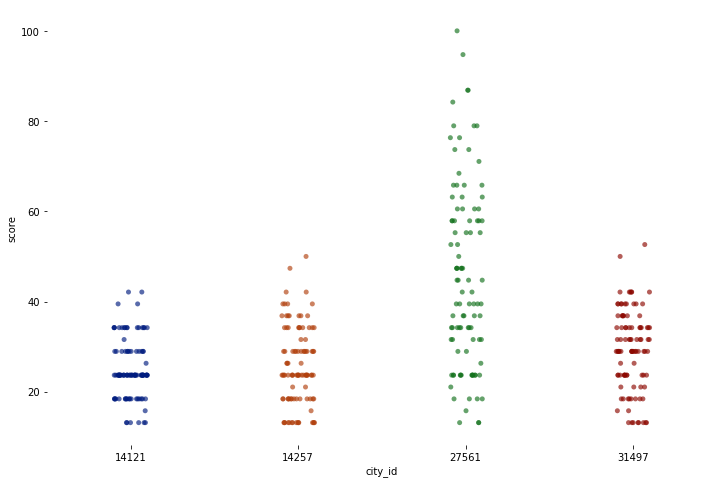

In [21]:
f, ax = plt.subplots()
sns.despine(bottom = True, left=True)
sns.stripplot(x = "city_id", y = "score", data=df, dodge=True, jitter = True, alpha =.65, zorder=5, palette="dark")


In [22]:
print(df.groupby('city_id').size())

city_id
14121    100
14257    100
27561    100
31497    100
dtype: int64


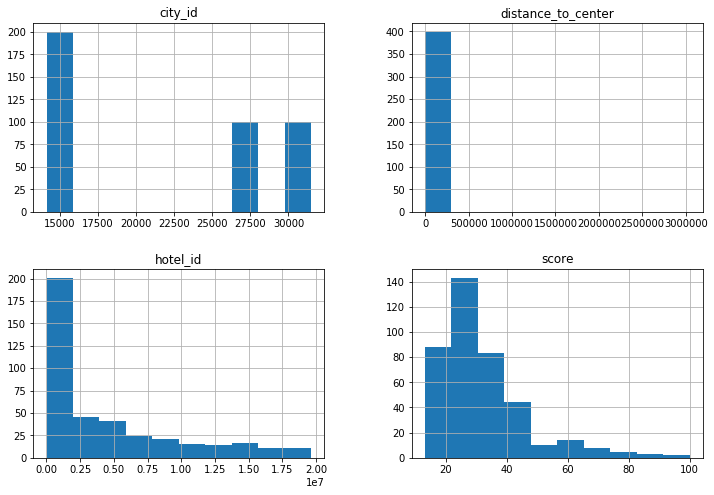

In [23]:
df.hist()
plt.show()

In [24]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [25]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [0]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [27]:
print (max(predictions))


66.0


In [30]:
pos

,city_id,poi_id,name,longitude,latitude,city,country,poi_types
0,14121,203796,White Tower of Thessaloniki,22.948381,40.626396,Thessaloniki,Greece,"Architectural Buildings, Historic Sites, Touri..."
1,14121,313891,Hagia Sophia,22.946700,40.632800,Thessaloniki,Greece,"Religious Sites, Tourist Attractions"
2,14121,362166,Saint Dimitirios,22.946100,40.634400,Thessaloniki,Greece,"Religious Sites, Tourist Attractions"
3,14121,457336,Museum of Byzantine Culture,22.954820,40.624138,Thessaloniki,Greece,"Museums, Tourist Attractions"
4,14121,457381,Ataturk Museum,22.954300,40.635777,Thessaloniki,Greece,"Architectural Buildings, Historic Sites, Museu..."
5,14121,525921,Nasim,22.941200,40.632000,Thessaloniki,Greece,"Bar / Pub, Food & Drink"
6,14121,528541,Taverna 1901,22.937400,40.634900,Thessaloniki,Greece,"Restaurants, Food & Drink"
7,14121,540671,Zoo,22.969400,40.636300,Thessaloniki,Greece,"Nature, Zoos / Aquariums"
8,14121,749116,Kaftanzoglio Stadium,22.967000,40.625500,Thessaloniki,Greece,"Stadium, Sports"
9,14121,763206,Rotunda,22.952496,40.633220,Thessaloniki,Greece,"Architectural Buildings, Historic Sites, Touri..."
